<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Infeniería de feature

Crear un modelo base para analizar el dataset de partidos<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('partidos.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/partidos.csv > partidos.csv
    else:
        !wget partidos.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/partidos.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 3070k    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 3070k  100 3070k    0     0  1023k      0  0:00:03  0:00:03 --:--:--  931k


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
df = pd.read_csv("partidos.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# ¿Cuántos datos quedaron para analizar?
# (filas, columnas)
df.shape

(41586, 9)

## Fin de la limpieza
No hay datos incompletos o mal ingresados en el dataset, está limpio! No es necesario ningún tipo de limpieza

In [6]:
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 41586


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [7]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Se puede observar que está el puntaje de cada partido pero no el resultado final (wins, loses, draws) --> (ganó, perdió, empató). Agregaremos una columna "results" con el resultado por partido.

In [8]:

df['result'] = df.apply(lambda x : 'wins' if x.home_score > x.away_score else 'loses' if x.home_score < x.away_score else 'draws', axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draws
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,wins
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,wins
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draws
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,wins


In [9]:
# En el registro de la totalidad de partidos, ¿Cuántos partidos se ganaron, cuántos se pierden y cuántos se empataron?
df['result'].value_counts()

wins     20234
loses    11774
draws     9578
Name: result, dtype: int64

In [10]:
# Renderizamos el gráfico utilizando el diagrama de cajas
print("¿Cuántos países hay registrados?:", df['home_team'].nunique())

¿Cuántos países hay registrados?: 308


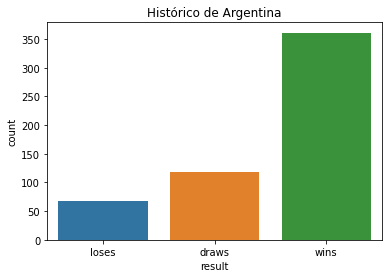

In [11]:
# Partidos jugados por Argentina de local:
pais_analizar = 'Argentina'
df_arg = df[ df['home_team'] == pais_analizar]
sns.countplot(x='result', data=df_arg).set_title(f"Histórico de {pais_analizar}")
# El countplot nos resuelve no tener que hacer lo siguiente:
#sns.barplot(x=df_arg['result'].value_counts().index, y=df_arg['result'].value_counts())
plt.show()

In [12]:
# Simplificar el resultado del datset, solo se tendrá encuenta si el local gana (target=1)
# Caso contrario target = 0
df['target'] = df['result'].apply(lambda x: 1 if x == 'wins' else 0)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,target
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draws,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,wins,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,wins,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draws,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,wins,1
...,...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,loses,0
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,loses,0
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,loses,0
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,loses,0


# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [ ]:
# Crear un numpy array "X" de los features de entrada que se utilizarian
# para entrar al modelo
# Se ha seleccionado los nombres de los equipos rivales, el consejo que
# que para aumentar la performance en vez de ingresar el nombre se realice
# binaryEncoding
# (queda para el almno que desee realizar el proyecto de este dataset)
X = df[['home_team', 'away_team']].values

# Crear un numpy array "y" con la salida/objetivo --> target
y = df['target'].values

In [ ]:
# Crear los dataset de entrenamiento (train) y evaluación (test)
# utilizando la herramienta train_test_split de scikit-learn,
# con la proporción 70%30%
# Ojo! Tener en cuenta que los dataset ahora son numpy array
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Creamos el modelo base
class RandomBaseModel():
  def fit(self,X, y):
    return None

  def predict(self,X):
    return np.random.randint(0, 2, size=X.shape[0])

In [ ]:
# Obtener la salida según el modelo base
random_model = RandomBaseModel()
random_model.fit(X_train, y_train)
y_hat_base = random_model.predict(X_test)

In [ ]:
# Dibujar la matriz de confusión con y_test e y_hat_base
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat_base)
cmd = ConfusionMatrixDisplay(cm, display_labels=['no_wins','wins'])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_base, normalize=True)

In [ ]:
# Calcular el f1_score
from sklearn.metrics import f1_score
f1_score(y_test, y_hat_base)

## Ejemplo con Gradio
Gradio es una librería para realizar GUI rápida de prueba para nuestros modelos\
Referencias:
- https://www.gradio.app/getting_started
- https://www.gradio.app/
- https://www.gradio.app/docs

In [ ]:
# Instalar Gradio
import sys
!{sys.executable} -m pip install gradio

In [ ]:
import gradio as gr

def partidos(home_team, away_team):
    x = np.array([[home_team, away_team]])
    y = random_model.predict(x)
    if y == 1:
        return f"El equipo local {home_team} es el ganador"
    else:
        return f"El equipo local {home_team} NO es el ganador"
    

iface = gr.Interface(
    fn=partidos,
    inputs=[gr.inputs.Textbox(placeholder="Equipo local"),
            gr.inputs.Textbox(placeholder="Equipo visitante")],
    outputs="text",
    layout="vertical")

iface.launch()